In [2]:
pip install pandas_ta

  Using cached pandas_ta-0.3.14b.tar.gz (115 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=305a58170a67468c3061e8ed4d636a44abe38c1e302ebc52cbe4bd4191ae6421
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/c3/5a/a9/ca9ca187b5addb71baabfcb6d4d12feb60d70598d459f00461
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas_ta as ta
import matplotlib as plt
import pandas as pd

In [2]:
start = '2010-01-01'
end= '2021-12-31'

In [3]:
data=yf.download('PTT.BK',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.50,14.600175,40044000
2010-01-05,24.799999,25.000000,24.299999,24.40,14.540581,69048000
2010-01-06,24.500000,24.600000,24.299999,24.50,14.600175,29298000
2010-01-07,24.700001,24.799999,24.400000,24.40,14.540581,48300000
2010-01-08,24.400000,24.799999,24.400000,24.60,14.659766,41024000
...,...,...,...,...,...,...
2021-12-24,38.000000,38.250000,37.750000,38.00,35.918053,19817700
2021-12-27,38.000000,38.000000,37.500000,37.75,35.681751,29699300
2021-12-28,37.750000,38.000000,37.750000,38.00,35.918053,18096900


<Axes: xlabel='Date'>

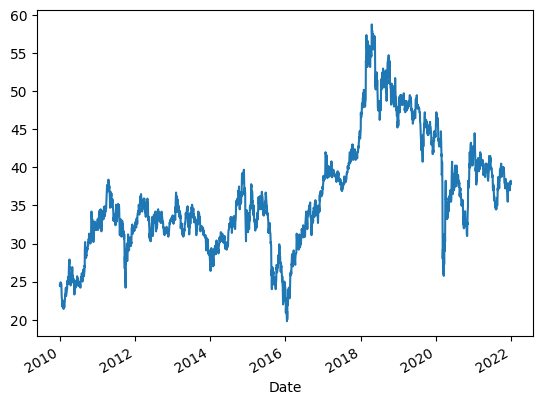

In [5]:
data.Close.plot()

<Axes: xlabel='Date'>

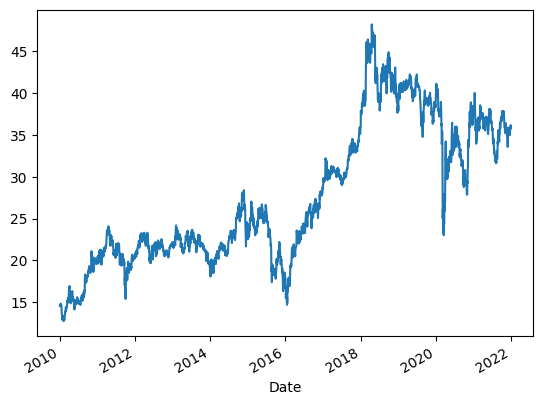

In [6]:
data['Adj Close'].plot()

In [7]:
emacross = ta.Strategy(
name='',
description = '',
ta=[
    {'kind':'ema','length':5},
        {'kind':'ema','length':20},
    {'kind':'macd'},
    {'kind':'rsi','length':10}

])

In [8]:
data.ta.strategy(emacross)

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_10
Date,,,,,,,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.50,14.600175,40044000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,24.799999,25.000000,24.299999,24.40,14.540581,69048000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,24.500000,24.600000,24.299999,24.50,14.600175,29298000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,24.700001,24.799999,24.400000,24.40,14.540581,48300000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,24.400000,24.799999,24.400000,24.60,14.659766,41024000,24.480000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,38.000000,38.250000,37.750000,38.00,35.918053,19817700,37.733404,37.529826,-0.000231,0.114955,-0.115185,57.348090
2021-12-27,38.000000,38.000000,37.500000,37.75,35.681751,29699300,37.738936,37.550795,0.014627,0.103850,-0.089223,53.209362
2021-12-28,37.750000,38.000000,37.750000,38.00,35.918053,18096900,37.825958,37.593576,0.046043,0.108213,-0.062170,56.682846


In [10]:
data['open_shift'] = data.Open.shift(1)

In [11]:
data['trend']=data['EMA_5']>data['EMA_20']

In [12]:
data.trend==data.trend.shift(1)

Date
2010-01-04    False
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2021-12-24     True
2021-12-27     True
2021-12-28     True
2021-12-29     True
2021-12-30     True
Name: trend, Length: 2926, dtype: bool

In [13]:
~(data.trend.eq(data.trend.shift(1)))
# recommend use this fast than ==

Date
2010-01-04     True
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2021-12-24    False
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
Name: trend, Length: 2926, dtype: bool

In [14]:
data[~(data.trend.eq(data.trend.shift(1)))]

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_10,open_shift,trend
Date,,,,,,,,,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.500000,14.600175,40044000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2010-02-23,22.799999,23.500000,22.600000,23.299999,13.885064,111360000,22.580672,22.443737,-0.387007,0.305177,-0.692184,67.095171,22.600000,True
2010-04-19,24.299999,25.100000,23.700001,24.500000,14.876811,122693000,25.430595,25.570694,0.436910,-0.259769,0.696678,38.520561,25.200001,False
2010-04-20,24.900000,26.000000,24.799999,26.000000,15.787634,113750000,25.620397,25.611580,0.421145,-0.220427,0.641572,53.126703,24.299999,True
2010-04-21,25.700001,26.100000,25.500000,25.500000,15.484024,76053000,25.580265,25.600954,0.364108,-0.221971,0.586079,48.830061,24.900000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,37.000000,38.000000,36.750000,37.000000,33.936611,142064800,36.000374,35.727869,-0.320558,0.327781,-0.648339,65.383644,35.250000,True
2021-10-27,39.250000,39.250000,38.750000,38.750000,36.626961,35816700,39.262178,39.381777,0.177367,-0.161823,0.339191,40.763683,39.500000,False
2021-12-14,37.500000,37.750000,37.250000,37.750000,35.681751,36242300,37.487759,37.414205,-0.191356,0.141930,-0.333286,55.177629,37.750000,True


In [15]:
data=data[~(data.trend.eq(data.trend.shift(1)))]

In [16]:
data['change']=data.open_shift.pct_change(1)

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_55997/2710735800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['change']=data.open_shift.pct_change(1)


In [17]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_10,open_shift,trend,change
Date,,,,,,,,,,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.500000,14.600175,40044000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2010-02-23,22.799999,23.500000,22.600000,23.299999,13.885064,111360000,22.580672,22.443737,-0.387007,0.305177,-0.692184,67.095171,22.600000,True,NaN
2010-04-19,24.299999,25.100000,23.700001,24.500000,14.876811,122693000,25.430595,25.570694,0.436910,-0.259769,0.696678,38.520561,25.200001,False,0.115044
2010-04-20,24.900000,26.000000,24.799999,26.000000,15.787634,113750000,25.620397,25.611580,0.421145,-0.220427,0.641572,53.126703,24.299999,True,-0.035714
2010-04-21,25.700001,26.100000,25.500000,25.500000,15.484024,76053000,25.580265,25.600954,0.364108,-0.221971,0.586079,48.830061,24.900000,False,0.024691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,37.000000,38.000000,36.750000,37.000000,33.936611,142064800,36.000374,35.727869,-0.320558,0.327781,-0.648339,65.383644,35.250000,True,-0.140244
2021-10-27,39.250000,39.250000,38.750000,38.750000,36.626961,35816700,39.262178,39.381777,0.177367,-0.161823,0.339191,40.763683,39.500000,False,0.120567
2021-12-14,37.500000,37.750000,37.250000,37.750000,35.681751,36242300,37.487759,37.414205,-0.191356,0.141930,-0.333286,55.177629,37.750000,True,-0.044304


In [18]:
data['change']=data.open_shift.pct_change(1).shift(-1)

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_55997/56254153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['change']=data.open_shift.pct_change(1).shift(-1)


In [19]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_10,open_shift,trend,change
Date,,,,,,,,,,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.500000,14.600175,40044000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2010-02-23,22.799999,23.500000,22.600000,23.299999,13.885064,111360000,22.580672,22.443737,-0.387007,0.305177,-0.692184,67.095171,22.600000,True,0.115044
2010-04-19,24.299999,25.100000,23.700001,24.500000,14.876811,122693000,25.430595,25.570694,0.436910,-0.259769,0.696678,38.520561,25.200001,False,-0.035714
2010-04-20,24.900000,26.000000,24.799999,26.000000,15.787634,113750000,25.620397,25.611580,0.421145,-0.220427,0.641572,53.126703,24.299999,True,0.024691
2010-04-21,25.700001,26.100000,25.500000,25.500000,15.484024,76053000,25.580265,25.600954,0.364108,-0.221971,0.586079,48.830061,24.900000,False,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,37.000000,38.000000,36.750000,37.000000,33.936611,142064800,36.000374,35.727869,-0.320558,0.327781,-0.648339,65.383644,35.250000,True,0.120567
2021-10-27,39.250000,39.250000,38.750000,38.750000,36.626961,35816700,39.262178,39.381777,0.177367,-0.161823,0.339191,40.763683,39.500000,False,-0.044304
2021-12-14,37.500000,37.750000,37.250000,37.750000,35.681751,36242300,37.487759,37.414205,-0.191356,0.141930,-0.333286,55.177629,37.750000,True,-0.006623


In [20]:
data.loc[data['trend']==False,'signal_return'] = -data['change']
data.loc[data['trend']==True,'signal_return'] = data['change']

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_55997/929184128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['trend']==False,'signal_return'] = -data['change']


In [21]:
data=data.iloc[1:]

In [22]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_10,open_shift,trend,change,signal_return
Date,,,,,,,,,,,,,,,,
2010-02-23,22.799999,23.50,22.600000,23.299999,13.885064,111360000,22.580672,22.443737,-0.387007,0.305177,-0.692184,67.095171,22.600000,True,0.115044,0.115044
2010-04-19,24.299999,25.10,23.700001,24.500000,14.876811,122693000,25.430595,25.570694,0.436910,-0.259769,0.696678,38.520561,25.200001,False,-0.035714,0.035714
2010-04-20,24.900000,26.00,24.799999,26.000000,15.787634,113750000,25.620397,25.611580,0.421145,-0.220427,0.641572,53.126703,24.299999,True,0.024691,0.024691
2010-04-21,25.700001,26.10,25.500000,25.500000,15.484024,76053000,25.580265,25.600954,0.364108,-0.221971,0.586079,48.830061,24.900000,False,0.012048,-0.012048
2010-04-26,25.600000,26.00,25.500000,25.799999,15.666187,72809000,25.594152,25.593903,0.253787,-0.180598,0.434385,51.918113,25.200001,True,0.015873,0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,37.000000,38.00,36.750000,37.000000,33.936611,142064800,36.000374,35.727869,-0.320558,0.327781,-0.648339,65.383644,35.250000,True,0.120567,0.120567
2021-10-27,39.250000,39.25,38.750000,38.750000,36.626961,35816700,39.262178,39.381777,0.177367,-0.161823,0.339191,40.763683,39.500000,False,-0.044304,0.044304
2021-12-14,37.500000,37.75,37.250000,37.750000,35.681751,36242300,37.487759,37.414205,-0.191356,0.141930,-0.333286,55.177629,37.750000,True,-0.006623,-0.006623


In [23]:
data.loc[data['signal_return']>0,'return_label']=1
data.loc[data['signal_return']<=0,'return_label']=-1

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_55997/3789315150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['signal_return']>0,'return_label']=1


In [24]:
df=data[['EMA_5','EMA_20','MACD_12_26_9','MACDs_12_26_9','RSI_10','return_label']]

In [25]:
df

,EMA_5,EMA_20,MACD_12_26_9,MACDs_12_26_9,RSI_10,return_label
Date,,,,,,
2010-02-23,22.580672,22.443737,-0.387007,-0.692184,67.095171,1.0
2010-04-19,25.430595,25.570694,0.436910,0.696678,38.520561,1.0
2010-04-20,25.620397,25.611580,0.421145,0.641572,53.126703,1.0
2010-04-21,25.580265,25.600954,0.364108,0.586079,48.830061,-1.0
2010-04-26,25.594152,25.593903,0.253787,0.434385,51.918113,1.0
...,...,...,...,...,...,...
2021-08-24,36.000374,35.727869,-0.320558,-0.648339,65.383644,1.0
2021-10-27,39.262178,39.381777,0.177367,0.339191,40.763683,1.0
2021-12-14,37.487759,37.414205,-0.191356,-0.333286,55.177629,-1.0


In [26]:
df =df.dropna()

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib as plt

2023-03-01 02:14:51.607164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
X_train,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=14)

In [30]:
X_train

,EMA_5,EMA_20,MACD_12_26_9,MACDs_12_26_9,RSI_10
Date,,,,,
2014-08-01,32.202830,32.369236,0.328417,0.574116,33.817645
2014-08-05,32.423480,32.404295,0.290617,0.471428,55.052616
2014-01-24,28.818375,28.733987,-0.106948,-0.228532,55.537475
2019-12-17,43.328287,43.300861,-0.356515,-0.540184,55.946507
2018-09-18,51.317079,51.198602,-0.038183,-0.053224,55.841913
...,...,...,...,...,...
2014-08-08,32.399549,32.409163,0.206708,0.357212,46.600138
2020-07-31,38.733156,38.659920,0.242264,0.335598,52.697942
2010-12-07,32.080089,31.790575,0.135526,0.133100,61.453555


In [31]:
y_train

Date
2014-08-01    1.0
2014-08-05    1.0
2014-01-24    1.0
2019-12-17    1.0
2018-09-18    1.0
             ... 
2014-08-08    1.0
2020-07-31    1.0
2010-12-07   -1.0
2016-04-11    1.0
2017-11-03   -1.0
Name: return_label, Length: 140, dtype: float64

In [32]:
from keras.api._v2.keras.layers import Dropout
from keras.api._v2.keras.layers import Dense

In [33]:
def my_model(layer1,layer2,dropout_rate,activation,lr=0.01,epochs=100,batch=16,):
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(layer1,activation=activation),
            Dropout(dropout_rate),
            Dense(layer2,activation=activation),
            Dense(1)
        ]
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='MeanSquaredError',metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    return model

In [34]:
!pip install --upgrade matplotlib

2023-03-01 02:15:45.614822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
7/7 [==============================] - 1s 21ms/step - loss: 1.3865 - accuracy: 0.5089 - val_loss: 1.3220 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2805 - accuracy: 0.2411 - val_loss: 1.9435 - val_accuracy: 0.6786
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2034 - accuracy: 0.6071 - val_loss: 0.8817 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8584 - accuracy: 0.1518 - val_loss: 0.9687 - val_accuracy: 0.6786
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.6071 - val_loss: 1.0489 - val_accuracy: 0.6786
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7456 - accuracy: 0.5268 - val_loss: 0.8875 - val_accuracy: 0.3929
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7679 - accuracy: 0.3304 - val_loss: 1.0070 - val_accuracy: 0.6786
Epoch 8/100
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 0.7635 - accuracy: 0.6786 - val_loss: 0.8739 - val_accuracy: 0.2500
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.3482 - val_loss: 0.9263 - val_accuracy: 0.6786
Epoch 61/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7452 - accuracy: 0.6696 - val_loss: 0.8603 - val_accuracy: 0.0000e+00
Epoch 62/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7503 - accuracy: 0.4107 - val_loss: 0.8990 - val_accuracy: 0.6786
Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.3393 - val_loss: 0.9070 - val_accuracy: 0.6786
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7457 - accuracy: 0.6429 - val_loss: 0.8908 - val_accuracy: 0.3214
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7311 - accuracy: 0.3750 - val_loss: 0.8844 - val_accuracy: 0.2857
Epoch 66/100
7/7 [===========

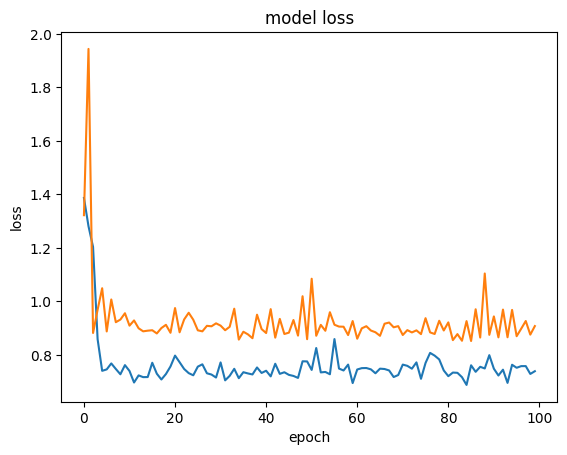

In [37]:
my_model(50,50,0.5,'tanh')